# Pandas Analysis of COVID-19 Pandemic Data

---

Adapted from [Roman Orac](https://romanorac.medium.com/pandas-analysis-of-coronavirus-pandemic-2b0d784e0806)

---

## Setup

In [1]:
import pandas as pd
import numpy as np

import os
import platform
from platform import python_version
import jupyterlab

import matplotlib.pyplot as plt
from datetime import datetime

print("System")
print("os name: %s" % os.name)
print("system: %s" % platform.system())
print("release: %s" % platform.release())
print()
print("Python")
print("version: %s" % python_version())
print()
print("Python Packages")
print("jupterlab==%s" % jupyterlab.__version__)
print("pandas==%s" % pd.__version__)
print("numpy==%s" % np.__version__)

System
os name: posix
system: Darwin
release: 18.7.0

Python
version: 3.7.9

Python Packages
jupterlab==2.2.6
pandas==1.1.3
numpy==1.19.2


---

In [2]:
source_url = "https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv"

In [3]:
df = pd.read_csv(source_url)
df.shape

(55670, 5)

In [4]:
df.Date = pd.to_datetime(df.Date)

In [5]:
df = df.sort_values('Date').reset_index(drop=True)

In [6]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Saint Vincent and the Grenadines,0,0,0
2,2020-01-22,Brunei,0,0,0
3,2020-01-22,San Marino,0,0,0
4,2020-01-22,Sao Tome and Principe,0,0,0


In [7]:
df.Country.value_counts()

Germany       293
Andorra       293
Honduras      293
Monaco        293
Brazil        293
             ... 
Hungary       293
Laos          293
Liberia       293
Qatar         293
Mauritania    293
Name: Country, Length: 190, dtype: int64

In [8]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Saint Vincent and the Grenadines,0,0,0
2,2020-01-22,Brunei,0,0,0
3,2020-01-22,San Marino,0,0,0
4,2020-01-22,Sao Tome and Principe,0,0,0


In [9]:
countries = ['US', 'Italy', 'China']

In [10]:
# df[df.Country == "US"].head()           # historical way to query
df.query('Country == "US"').head()

,Date,Country,Confirmed,Recovered,Deaths
49,2020-01-22,US,1,0,0
327,2020-01-23,US,1,0,0
547,2020-01-24,US,2,0,0
620,2020-01-25,US,2,0,0
928,2020-01-26,US,5,0,0


In [11]:
df.query('Country in @countries').head()

,Date,Country,Confirmed,Recovered,Deaths
49,2020-01-22,US,1,0,0
99,2020-01-22,Italy,0,0,0
158,2020-01-22,China,548,28,17
277,2020-01-23,Italy,0,0,0
286,2020-01-23,China,643,30,18


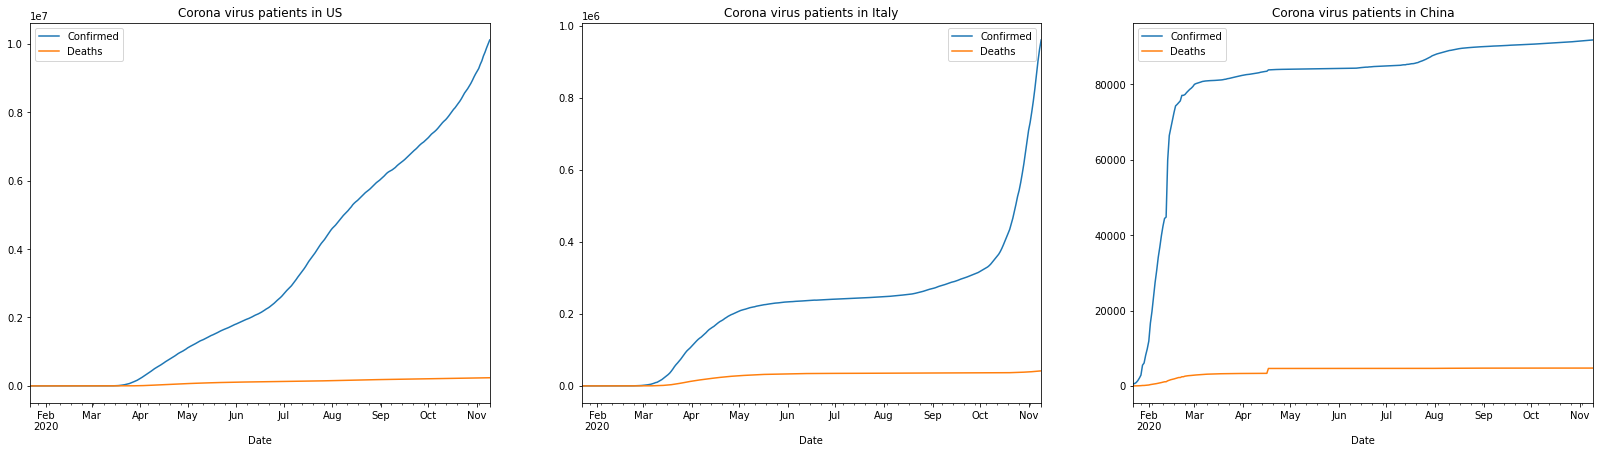

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(28, 7))

for i in range(3):
    country = countries[i]
    ax[i].set_title('Corona virus patients in %s' % country)
    df[df.Country == country][['Date', 'Confirmed']].plot(ax=ax[i], x='Date')
    df[df.Country == country][['Date', 'Deaths']].plot(ax=ax[i], x='Date')